## HomeWork 5

**Bakhshande 98522157**

## Q1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q1.1

In [2]:
def denoise_image(image):
    """
    Denoises the input image.
    ----------
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result denoised image.   
    """

    denoised = image.copy()
    
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)      # for change loc of f(0,0) to center
    
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('noisy fft Magnitude Spectrum')
    plt.show()

    x1s = [50, 100, 270, 1020, 1180, 1230]
    x2s = [90, 460, 830, 1210]
    xm = 645
    y1s = [50, 180, 290, 405, 520, 640, 750]
    y2s = [0, 110, 225, 340, 465, 580, 705, 810]
    y3s = [40, 170, 290, 520, 640, 770]
    l = 20
    
    for y in y1s: 
        for x in x1s:
            fshift[y-l:y+l, x-l:x+l] = 0.001
            
    for y in y2s: 
        for x in x2s:
            fshift[y-l:y+l, x-l:x+l] = 0.001
            
    for y in y3s: 
        fshift[y-l:y+l, xm-l:xm+l] = 0.001

    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    print(np.min(magnitude_spectrum))
    plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('denoised fft Magnitude Spectrum')
    plt.show()
            
    f = np.fft.ifftshift(fshift)
    denoised = np.real(np.fft.ifft2(f))
    
    return denoised

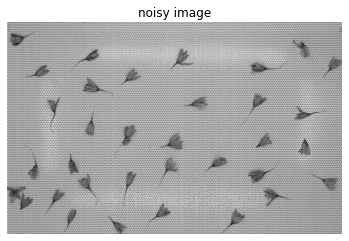

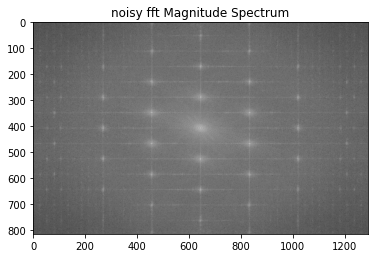

-138.15510557964274


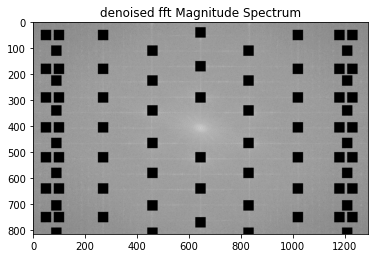

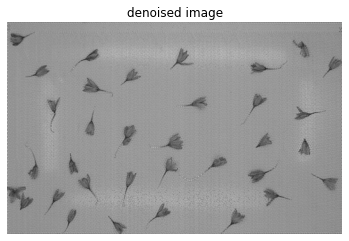

In [3]:
path = r'images\img_01.jpg'
image = cv2.imread(path, 0)
plt.imshow(image, cmap='gray')
plt.title("noisy image")
plt.axis('off')
plt.show()

denoised_image = denoise_image(image)
plt.imshow(denoised_image, cmap='gray')
plt.title("denoised image")
plt.axis('off')
plt.show()

### Q1.2

(-0.5, 1289.5, 814.5, -0.5)

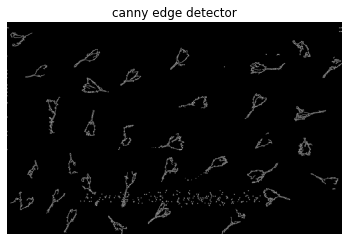

In [4]:
edges = cv2.Canny(np.uint8(denoised_image),100, 500)
plt.title('canny edge detector')
plt.imshow(edges, cmap='gray')
plt.axis('off')

(-0.5, 1289.5, 814.5, -0.5)

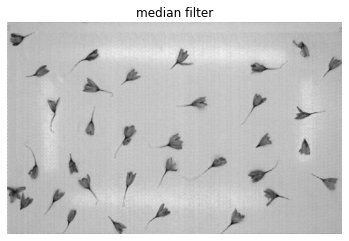

In [5]:
smoothed = cv2.medianBlur(np.uint8(denoised_image), 5)
plt.imshow(smoothed, cmap='gray')
plt.title('median filter')
plt.axis('off')

(-0.5, 1289.5, 814.5, -0.5)

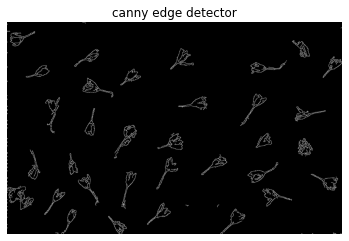

In [6]:
edges = cv2.Canny(np.uint8(smoothed),35,120)
plt.title('canny edge detector')
plt.imshow(edges, cmap='gray')
plt.axis('off')

### Q1.3

(-0.5, 1289.5, 814.5, -0.5)

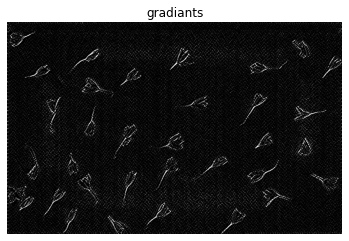

In [7]:
sobel2D = cv2.Sobel(src=smoothed, ddepth=-1, dx=1, dy=1, ksize=5)
plt.imshow(sobel2D, cmap='gray')
plt.title('gradiants')
plt.axis('off')

(-0.5, 1289.5, 814.5, -0.5)

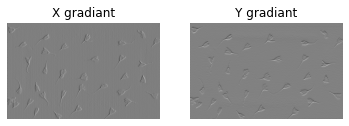

In [8]:
Xsobel = cv2.Sobel(src=smoothed, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
Ysobel = cv2.Sobel(src=smoothed, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

plt.subplot(1, 2, 1)
plt.imshow(Xsobel, cmap='gray')
plt.title('X gradiant')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Ysobel, cmap='gray')
plt.title('Y gradiant')
plt.axis('off')

gradiants' orientations:
 [[ -55.2683058   -56.8677319   -72.24174152  -81.43085812  -91.90915243]
 [ -64.47030201  -56.00354085  -69.9342951   -74.475889    -65.72555887]
 [-149.62087399  -56.42710159  -63.12186025  -57.09475708  -35.64702075]
 [ 151.75026451  -98.13010235  -44.13194855  -32.81634341  -22.24902366]
 [ 157.99930165  154.093492    -31.50426672  -34.24903301  -36.36919821]]


Text(0.5, 1.0, 'gradiants degree')

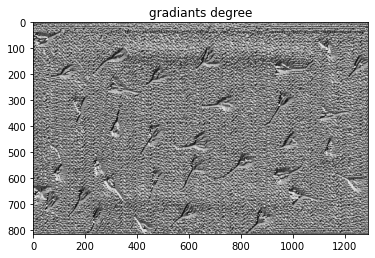

In [10]:
atan = np.arctan2(Ysobel , Xsobel)
degree = atan * 180 / np.pi

print("gradiants' orientations:\n" , degree[500:505, 500:505])
plt.imshow(atan, cmap='gray')
plt.title('gradiants degree')
# plt.axis('off')